In [429]:
import numpy as np
import pandas as pd
import pickle as pl
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [496]:
%matplotlib qt

In [452]:
def load_data(path):
    methods = ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]
    Ks = np.load("results/" + path + "/K.npy")
    
    neighborhood_size_q = dict()
    rating_overlap_q = dict()
    mean_absolute_error = dict()
    privacy_risk_dp = dict()
    privacy_risk_dp_secures = dict()
    frac_vulnerables = dict()
    for m in methods:
        neighborhood_size_q[m] = np.load("results/" + path + "/neighborhood_size_q_" + m + ".npy")
        rating_overlap_q[m] = np.load("results/" + path + "/rating_overlap_q_" + m + ".npy")
        mean_absolute_error[m] = np.load("results/" + path + "/mae_" + m + ".npy")
        privacy_risk_dp[m] = np.load("results/" + path + "/privacy_risk_dp_" + m + ".npy")
        privacy_risk_dp_secures[m] = np.load("results/" + path + "/privacy_risk_dp_secures_" + m + ".npy")
        frac_vulnerables[m] = np.load("results/" + path + "/fraction_vulnerables_" + m + ".npy")
    
    return {"K": Ks,
            "neighborhood_size_q": neighborhood_size_q, 
            "rating_overlap_q": rating_overlap_q, 
            "mae": mean_absolute_error, 
            "privacy_risk_dp": privacy_risk_dp, 
            "privacy_risk_dp_secures": privacy_risk_dp_secures, 
            "fraction_vulnerables": frac_vulnerables}

def load_data_dp(path):
    methods = ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse", "userknn_no", "userknn_full"]
    
    Ks = np.load("results/" + path + "/K.npy")
    
    mean_absolute_error = dict()
    privacy_risk_dp = dict()
    privacy_risk_dp_secures = dict()
    frac_vulnerables = dict()
    recommendation_frequency = dict()
    for m in methods:
        mean_absolute_error[m] = np.load("results/" + path + "/mae_" + m + ".npy")
        privacy_risk_dp[m] = np.load("results/" + path + "/privacy_risk_dp_" + m + ".npy")
        privacy_risk_dp_secures[m] = np.load("results/" + path + "/privacy_risk_dp_secures_" + m + ".npy")
        frac_vulnerables[m] = np.load("results/" + path + "/fraction_vulnerables_" + m + ".npy")
        
        recommendation_frequency[m] = pl.load(open("results/" + path + "/recommendation_frequency_" + m + ".pkl", "rb"))
    
    return {"K": Ks,
            "neighborhood_size_q": neighborhood_size_q, 
            "rating_overlap_q": rating_overlap_q, 
            "mae": mean_absolute_error, 
            "privacy_risk_dp": privacy_risk_dp, 
            "privacy_risk_dp_secures": privacy_risk_dp_secures, 
            "fraction_vulnerables": frac_vulnerables,
            "recommendation_frequency": recommendation_frequency}

# Preliminary

In [453]:
ml1m = load_data(path="protected/ml-1m")
douban = load_data(path="protected/douban")
lfm = load_data(path="protected/lfm")
ciao = load_data(path="protected/ciao")
goodreads = load_data(path="protected/goodreads")

ml1m_dp = load_data_dp(path="protected/ml-1m")
douban_dp = load_data_dp(path="protected/douban")
lfm_dp = load_data_dp(path="protected/lfm")
ciao_dp = load_data_dp(path="protected/ciao")
goodreads_dp = load_data_dp(path="protected/goodreads")

# Neighborhood Size

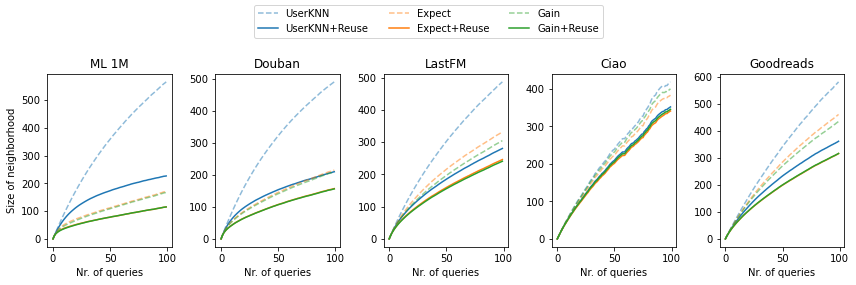

In [397]:
def plot(ax, data, k_idx=0, n_queries=100): 
    ax.plot(range(100), data["userknn"][k_idx][:n_queries], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(range(100), data["userknn_reuse"][k_idx][:n_queries], color="C0", linestyle="solid")
    ax.plot(range(100), data["expect"][k_idx][:n_queries], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(range(100), data["expect_reuse"][k_idx][:n_queries], color="C1", linestyle="solid")
    ax.plot(range(100), data["gain"][k_idx][:n_queries], color="C2", linestyle="dashed", alpha=0.5)    
    ax.plot(range(100), data["gain_reuse"][k_idx][:n_queries], color="C2", linestyle="solid")

fig, axes = plt.subplots(1, 5, figsize=(12, 4), sharex=False)
plot(axes[0], ml1m["neighborhood_size_q"])
plot(axes[1], douban["neighborhood_size_q"])
plot(axes[2], lfm["neighborhood_size_q"])
plot(axes[3], ciao["neighborhood_size_q"])
plot(axes[4], goodreads["neighborhood_size_q"])


axes[0].set_ylabel("Size of neighborhood")
axes[0].set_xlabel("Nr. of queries")
axes[1].set_xlabel("Nr. of queries")
axes[2].set_xlabel("Nr. of queries")
axes[3].set_xlabel("Nr. of queries")
axes[4].set_xlabel("Nr. of queries")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
axes[2].set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)
fig.align_ylabels(axes)

# Rating Overlap

In [497]:
def plot(ax, data, k_idx=0, n_queries=100): 
    ax.plot(range(100), data["userknn"][k_idx][:n_queries], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(range(100), data["userknn_reuse"][k_idx][:n_queries], color="C0", linestyle="solid")
    ax.plot(range(100), data["expect"][k_idx][:n_queries], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(range(100), data["expect_reuse"][k_idx][:n_queries], color="C1", linestyle="solid")
    ax.plot(range(100), data["gain"][k_idx][:n_queries], color="C2", linestyle="dashed", alpha=0.5)    
    ax.plot(range(100), data["gain_reuse"][k_idx][:n_queries], color="C2", linestyle="solid")

fig, axes = plt.subplots(1, 5, figsize=(12, 4), sharex=False)
plot(axes[0], ml1m["rating_overlap_q"])
plot(axes[1], douban["rating_overlap_q"])
plot(axes[2], lfm["rating_overlap_q"])
plot(axes[3], ciao["rating_overlap_q"])
plot(axes[4], goodreads["rating_overlap_q"])


axes[0].set_ylabel("Avg. rating overlap")
axes[0].set_xlabel("Nr. of queries")
axes[1].set_xlabel("Nr. of queries")
axes[2].set_xlabel("Nr. of queries")
axes[3].set_xlabel("Nr. of queries")
axes[4].set_xlabel("Nr. of queries")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
axes[2].set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)
fig.align_ylabels(axes)

# Accuracy w\o DP

In [399]:
TODO

NameError: name 'TODO' is not defined

# Fraction of Vulnerables

In [427]:
def print_frac_vulnerables(data, k_idx=1):
    print("UserKNN: %.2f" % (data["userknn"][k_idx] * 100))
    print("UserKNN+Reuse: %.2f" % (data["userknn_reuse"][k_idx] * 100))

    print("Expect: %.2f" % (data["expect"][k_idx] * 100))
    print("Expect+Reuse: %.2f" % (data["expect_reuse"][k_idx] * 100))

    print("Gain: %.2f" % (data["gain"][k_idx] * 100))
    print("Gain+Reuse: %.2f" % (data["gain_reuse"][k_idx] * 100))

print("=== MovieLens 1M ===")
print_frac_vulnerables(ml1m["fraction_vulnerables"], k_idx=1)
print()

print("=== Douban ===")
print_frac_vulnerables(douban["fraction_vulnerables"], k_idx=1)
print()

print("=== LastFM ===")
print_frac_vulnerables(lfm["fraction_vulnerables"], k_idx=1)
print()

print("=== Ciao ===")
print_frac_vulnerables(ciao["fraction_vulnerables"], k_idx=1)
print()

print("=== Goodreads ===")
print_frac_vulnerables(goodreads["fraction_vulnerables"], k_idx=1)
print()

=== MovieLens 1M ===
UserKNN: 80.45
UserKNN+Reuse: 84.98
Expect: 24.37
Expect+Reuse: 25.15
Gain: 24.83
Gain+Reuse: 27.33

=== Douban ===
UserKNN: 96.65
UserKNN+Reuse: 87.64
Expect: 34.60
Expect+Reuse: 41.45
Gain: 37.19
Gain+Reuse: 43.80

=== LastFM ===
UserKNN: 99.90
UserKNN+Reuse: 99.20
Expect: 68.53
Expect+Reuse: 79.83
Gain: 81.07
Gain+Reuse: 84.30

=== Ciao ===
UserKNN: 8.07
UserKNN+Reuse: 7.89
Expect: 7.82
Expect+Reuse: 7.80
Gain: 8.14
Gain+Reuse: 7.91

=== Goodreads ===
UserKNN: 63.75
UserKNN+Reuse: 50.76
Expect: 28.62
Expect+Reuse: 27.69
Gain: 39.77
Gain+Reuse: 36.39



# Accuracy w\ DP

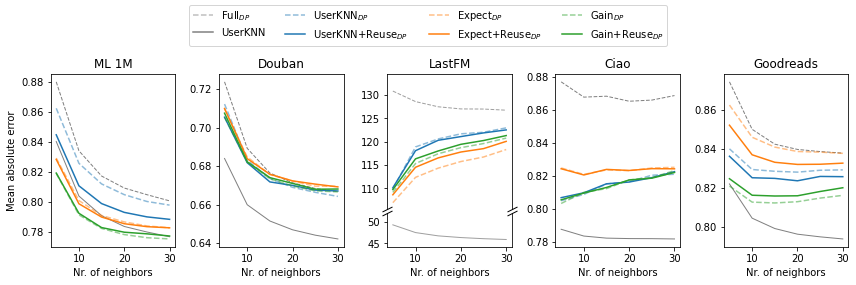

In [435]:
def plot(ax, data, K): 
    ax.plot(K, data["userknn_full"], color="gray", linestyle="dashed", linewidth=1)
    ax.plot(K, data["userknn_no"], color="gray", linestyle="solid", linewidth=1)
    ax.plot(K, data["userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(K, data["userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(K, data["expect"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(K, data["expect_reuse"], color="C1", linestyle="solid")
    ax.plot(K, data["gain"], color="C2", linestyle="dashed", alpha=0.5)    
    ax.plot(K, data["gain_reuse"], color="C2", linestyle="solid")

fig, axes = plt.subplots(1, 5, figsize=(12, 4), sharex=False)
plot(axes[0], ml1m_dp["mae"], K=ml1m_dp["K"])
plot(axes[1], douban_dp["mae"], K=douban_dp["K"])
plot(axes[3], ciao_dp["mae"], K=ciao_dp["K"])
plot(axes[4], goodreads_dp["mae"], K=goodreads_dp["K"])

ax = axes[2]
divider = make_axes_locatable(ax)
ax_top = divider.new_vertical(size="400%", pad=0.05)
fig.add_axes(ax_top)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_full"], color="gray", linestyle="dashed", alpha=0.75, linewidth=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn"], color="C0", linestyle="dashed", alpha=0.5)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["expect"], color="C1", linestyle="dashed", alpha=0.5)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["gain"], color="C2", linestyle="dashed", alpha=0.5)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_reuse"], color="C0", linestyle="solid")
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["expect_reuse"], color="C1", linestyle="solid")
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["gain_reuse"], color="C2", linestyle="solid")
ax.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_no"], color="gray", linestyle="solid", alpha=0.75, linewidth=1)
ax.spines['top'].set_visible(False)
ax.set_ylim(44.2, 52)
ax_top.set_ylim(105.5, 134.5)
ax_top.tick_params(bottom=False, labelbottom=False)
ax_top.spines['bottom'].set_visible(False)
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)

axes[0].set_ylabel("Mean absolute error")
axes[0].set_xlabel("Nr. of neighbors")
axes[1].set_xlabel("Nr. of neighbors")
axes[2].set_xlabel("Nr. of neighbors")
axes[3].set_xlabel("Nr. of neighbors")
axes[4].set_xlabel("Nr. of neighbors")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
ax_top.set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = [r"Full$_{DP}$", "UserKNN", r"UserKNN$_{DP}$", r"UserKNN+Reuse$_{DP}$", r"Expect$_{DP}$", r"Expect+Reuse$_{DP}$", r"Gain$_{DP}$", r"Gain+Reuse$_{DP}$"]

fig.legend(lines, labels, ncol=4, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)
fig.align_ylabels(axes)

# Privacy Risk w\ DP

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


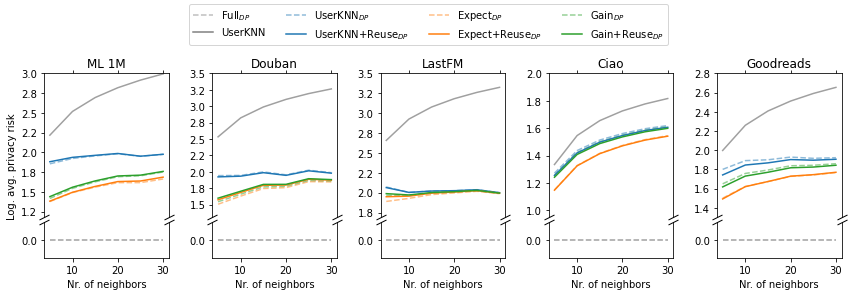

In [414]:
def plot(ax, data, K): 
    ax.plot(K, data["userknn_full"], color="gray", linestyle="dashed", linewidth=1)
    ax.plot(K, data["userknn_no"], color="gray", linestyle="solid", linewidth=1)
    ax.plot(K, data["userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(K, data["userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(K, data["expect"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(K, data["expect_reuse"], color="C1", linestyle="solid")
    ax.plot(K, data["gain"], color="C2", linestyle="dashed", alpha=0.5)    
    ax.plot(K, data["gain_reuse"], color="C2", linestyle="solid")

def plot_k_pr(axes, data, K):
    ax1, ax2 = axes
    
    ax1.plot(K, np.log10(data["userknn"]), color="C0", linestyle="dashed", alpha=0.5)
    ax1.plot(K, np.log10(data["expect"]), color="C1", linestyle="dashed", alpha=0.5)
    ax1.plot(K, np.log10(data["gain"]), color="C2", linestyle="dashed", alpha=0.5)
    ax1.plot(K, np.log10(data["userknn_reuse"]), color="C0", linestyle="solid")
    ax1.plot(K, np.log10(data["expect_reuse"]), color="C1", linestyle="solid")
    ax1.plot(K, np.log10(data["gain_reuse"]), color="C2", linestyle="solid")
    ax1.plot(K, np.log10(data["userknn_no"]), color="gray", linestyle="solid", alpha=0.75)
    ax2.plot(K, data["userknn_full"], color="gray", linestyle="dashed", alpha=0.75)
    
    ymax = max(np.log10(data["userknn_no"]))
    ymin = min(np.log10(data["expect"]))
    ax1.set_ylim(ymin-0.2, ymax)
    
    #ax1.set_ylim(3, 6.8)
    ax2.set_ylim(-0.25, 0.25)

    ax1.spines["bottom"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)
    ax2.xaxis.tick_bottom()

    ticks = ax1.get_yticks()
    ax1.set_yticks(ticks[1:])
    ax2.set_yticks([0.0])
    
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    d = .5
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
fig, axes = plt.subplots(2, 5, figsize=(12, 4), gridspec_kw={"hspace": 0.05, "height_ratios": [4, 1]})
ax = fig.add_subplot(111, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
plot_k_pr(axes[:, 0], ml1m_dp["privacy_risk_dp"], ml1m_dp["K"])
plot_k_pr(axes[:, 1], douban_dp["privacy_risk_dp"], douban_dp["K"])
plot_k_pr(axes[:, 2], lfm_dp["privacy_risk_dp"], lfm_dp["K"])
plot_k_pr(axes[:, 3], ciao_dp["privacy_risk_dp"], ciao_dp["K"])
plot_k_pr(axes[:, 4], goodreads_dp["privacy_risk_dp"], goodreads_dp["K"])

axes[0, 0].set_title("ML 1M")
axes[0, 1].set_title("Douban")
axes[0, 2].set_title("LastFM")
axes[0, 3].set_title("Ciao")
axes[0, 4].set_title("Goodreads")


axes[1, 0].set_xlabel("Nr. of neighbors")
axes[1, 1].set_xlabel("Nr. of neighbors")
axes[1, 2].set_xlabel("Nr. of neighbors")
axes[1, 3].set_xlabel("Nr. of neighbors")
axes[1, 4].set_xlabel("Nr. of neighbors")

colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = [r"Full$_{DP}$", "UserKNN", r"UserKNN$_{DP}$", r"UserKNN+Reuse$_{DP}$", r"Expect$_{DP}$", r"Expect+Reuse$_{DP}$", r"Gain$_{DP}$", r"Gain+Reuse$_{DP}$"]

fig.legend(lines, labels, ncol=4, loc='upper center')
fig.tight_layout()
#fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)
fig.subplots_adjust(top=.75, bottom=0.11, hspace=0.35, wspace=0.35)

fig.align_ylabels(axes)

# Privacy Risk w\ DP - Secures

In [446]:
def print_privacy_risk_dp_secures(data, k_idx=1):
    print("UserKNN: %.4f" % data["userknn"][k_idx])
    print("UserKNN+Reuse: %.4f" % data["userknn_reuse"][k_idx])
    print("Expect: %.4f" % data["expect"][k_idx])
    print("Expect+Reuse: %.4f" % data["expect_reuse"][k_idx])
    print("Gain: %.4f" % data["gain"][k_idx])
    print("Gain+Reuse: %.4f" % data["gain_reuse"][k_idx])

print("=== MovieLens 1M ===")
print_privacy_risk_dp_secures(ml1m_dp["privacy_risk_dp_secures"], k_idx=1)
print()

print("=== Douban ===")
print_privacy_risk_dp_secures(douban_dp["privacy_risk_dp_secures"], k_idx=1)
print()

print("=== LastFM ===")
print_privacy_risk_dp_secures(lfm_dp["privacy_risk_dp_secures"], k_idx=1)
print()

print("=== Ciao ===")
print_privacy_risk_dp_secures(ciao_dp["privacy_risk_dp_secures"], k_idx=1)
print()

print("=== Goodreads ===")
print_privacy_risk_dp_secures(goodreads_dp["privacy_risk_dp_secures"], k_idx=1)
print()

=== MovieLens 1M ===
UserKNN: 50.9424
UserKNN+Reuse: 56.8931
Expect: 11.4032
Expect+Reuse: 10.9668
Gain: 16.3744
Gain+Reuse: 15.3614

=== Douban ===
UserKNN: 60.9405
UserKNN+Reuse: 62.8806
Expect: 18.0829
Expect+Reuse: 19.7189
Gain: 19.9753
Gain+Reuse: 20.5277

=== LastFM ===
UserKNN: 65.3333
UserKNN+Reuse: 75.3750
Expect: 49.4492
Expect+Reuse: 49.0033
Gain: 51.5194
Gain+Reuse: 54.0234

=== Ciao ===
UserKNN: 21.5957
UserKNN+Reuse: 20.5675
Expect: 15.1745
Expect+Reuse: 15.0850
Gain: 20.5603
Gain+Reuse: 19.8254

=== Goodreads ===
UserKNN: 42.7189
UserKNN+Reuse: 41.4477
Expect: 19.5097
Expect+Reuse: 20.1951
Gain: 30.4655
Gain+Reuse: 28.5189



# Popularity Bias w\ DP

In [485]:
df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
ml1m_popularity = df.groupby("item_id").size()

df = pd.read_csv("data/douban/douban.csv", sep=";", names=["user_id", "item_id", "rating"])
douban_popularity = df.groupby("item_id").size()

df = pd.read_csv("data/lfm/artist_ratings.csv", sep=";", names=["user_id", "item_id", "rating"])
lfm_popularity = df.groupby("item_id").size()

df = pd.read_csv("data/ciao/ciao.csv", sep=";", names=["user_id", "item_id", "rating"])
ciao_popularity = df.groupby("item_id").size()

df = pd.read_csv("data/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])
goodreads_popularity = df.groupby("item_id").size()

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [486]:
def pearson_dict(x_dict, y_dict):
    x, y = [], []
    for key, x_data in x_dict.items():
        y_data = y_dict[key]
        x.append(y_data)
        y.append(x_data)
    r, p = pearsonr(x, y)
    return r, p

def z_test(correlation_coefficient_1, correlation_coefficient_2, n):
    z1 = 0.5 * (np.log(1 + correlation_coefficient_1) - np.log(1 - correlation_coefficient_1))
    z2 = 0.5 * (np.log(1 + correlation_coefficient_2) - np.log(1 - correlation_coefficient_2))
    
    n1 = n2 = n
    return (z1 - z2) / np.sqrt((1 / (n1 - 3)) + (1 / (n2 - 3)))

In [487]:
def print_correlation(data, popularity, k_idx=1):
    r, p = pearson_dict(data["userknn_full"][k_idx], popularity)
    print("UserKNN Full: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["userknn"][k_idx], popularity)
    print("UserKNN: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["userknn_reuse"][k_idx], popularity)
    print("UserKNN+Reuse: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["expect"][k_idx], popularity)
    print("Expect: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["expect_reuse"][k_idx], popularity)
    print("Expect+Reuse: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["gain"][k_idx], popularity)
    print("Gain: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["gain_reuse"][k_idx], popularity)
    print("Gain+Reuse: %.4f (%.4f)" % (r, p))

print("=== MovieLens 1M === ")
print_correlation(ml1m_dp["recommendation_frequency"], ml1m_popularity)
print()

print("=== Douban === ")
print_correlation(douban_dp["recommendation_frequency"], douban_popularity)
print()

print("=== LastFM === ")
print_correlation(lfm_dp["recommendation_frequency"], lfm_popularity)
print()

print("=== Ciao === ")
print_correlation(ciao_dp["recommendation_frequency"], ciao_popularity)
print()

print("=== Goodreads === ")
print_correlation(goodreads_dp["recommendation_frequency"], goodreads_popularity)
print()

=== MovieLens 1M === 
UserKNN Full: 0.8671 (0.0000)
UserKNN: 0.8642 (0.0000)
UserKNN+Reuse: 0.8671 (0.0000)
Expect: 0.8637 (0.0000)
Expect+Reuse: 0.8656 (0.0000)
Gain: 0.8672 (0.0000)
Gain+Reuse: 0.8666 (0.0000)

=== Douban === 
UserKNN Full: 0.7456 (0.0000)
UserKNN: 0.7393 (0.0000)
UserKNN+Reuse: 0.7350 (0.0000)
Expect: 0.7233 (0.0000)
Expect+Reuse: 0.7280 (0.0000)
Gain: 0.7263 (0.0000)
Gain+Reuse: 0.7276 (0.0000)

=== LastFM === 
UserKNN Full: 0.8004 (0.0000)
UserKNN: 0.8026 (0.0000)
UserKNN+Reuse: 0.8137 (0.0000)
Expect: 0.8451 (0.0000)
Expect+Reuse: 0.8272 (0.0000)
Gain: 0.8204 (0.0000)
Gain+Reuse: 0.8281 (0.0000)

=== Ciao === 
UserKNN Full: 0.9353 (0.0000)
UserKNN: 0.9362 (0.0000)
UserKNN+Reuse: 0.9339 (0.0000)
Expect: 0.9359 (0.0000)
Expect+Reuse: 0.9341 (0.0000)
Gain: 0.9393 (0.0000)
Gain+Reuse: 0.9384 (0.0000)

=== Goodreads === 
UserKNN Full: 0.9448 (0.0000)
UserKNN: 0.9349 (0.0000)
UserKNN+Reuse: 0.9350 (0.0000)
Expect: 0.9258 (0.0000)
Expect+Reuse: 0.9266 (0.0000)
Gain: 0.9

In [495]:
def print_z_test(data, popularity, k_idx=1):
    n_items = len(popularity)
    r_base, _ = pearson_dict(data["userknn"][k_idx], popularity)
    
    r, _ = pearson_dict(data["userknn_full"][k_idx], popularity)
    print("UserKNN Full: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["userknn_reuse"][k_idx], popularity)
    print("UserKNN+Reuse: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["expect"][k_idx], popularity)
    print("Expect: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["expect_reuse"][k_idx], popularity)
    print("Expect+Reuse: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["gain"][k_idx], popularity)
    print("Gain: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["gain_reuse"][k_idx], popularity)
    print("Gain+Reuse: %.4f" % z_test(r_base, r, n=n_items))

print("=== MovieLens 1M ===")
print_z_test(ml1m_dp["recommendation_frequency"], ml1m_popularity)
print()

print("=== Douban ===")
print_z_test(douban_dp["recommendation_frequency"], douban_popularity)
print()

print("=== LastFM ===")
print_z_test(lfm_dp["recommendation_frequency"], lfm_popularity)
print()

print("=== Ciao ===")
print_z_test(ciao_dp["recommendation_frequency"], ciao_popularity)
print()

print("=== Goodreads ===")
print_z_test(goodreads_dp["recommendation_frequency"], goodreads_popularity)
print()

=== MovieLens 1M ===
UserKNN Full: -0.4952
UserKNN+Reuse: -0.4966
Expect: 0.0931
Expect+Reuse: -0.2312
Gain: -0.5023
Gain+Reuse: -0.3985

=== Douban ===
UserKNN Full: -1.9878
UserKNN+Reuse: 1.3332
Expect: 4.8432
Expect+Reuse: 3.4343
Gain: 3.9411
Gain+Reuse: 3.5673

=== LastFM ===
UserKNN Full: 2.5932
UserKNN+Reuse: -13.5318
Expect: -55.8070
Expect+Reuse: -30.8862
Gain: -21.8833
Gain+Reuse: -32.0928

=== Ciao ===
UserKNN Full: 1.7715
UserKNN+Reuse: 4.2332
Expect: 0.5749
Expect+Reuse: 3.9577
Gain: -5.8285
Gain+Reuse: -4.1021

=== Goodreads ===
UserKNN Full: -42.6638
UserKNN+Reuse: -0.3285
Expect: 34.3666
Expect+Reuse: 31.4750
Gain: -30.3021
Gain+Reuse: -8.7219



In [500]:
significance_tests = pl.load(open("results/protected/ml-1m/significance_test_results.pkl", "rb"))

In [518]:
significance_tests["gain"][0]["avg_rating_overlap_q"][">"][0]

[{'p': inf, 'sample_size': 6038, 'r': nan, 'U': nan},
 {'p': 0.0, 'sample_size': 6038, 'r': -0.6553070025751109, 'U': 4434780.5},
 {'p': 0.0, 'sample_size': 6018, 'r': -0.6416784143352715, 'U': 4690427.0},
 {'p': 0.0, 'sample_size': 5939, 'r': -0.6384018811146299, 'U': 4634809.5},
 {'p': 0.0, 'sample_size': 5809, 'r': -0.6404511254559861, 'U': 4394188.0},
 {'p': 0.0, 'sample_size': 5598, 'r': -0.6457249561003371, 'U': 3985324.5},
 {'p': 0.0, 'sample_size': 5353, 'r': -0.6577944094254287, 'U': 3444412.5},
 {'p': 0.0, 'sample_size': 5080, 'r': -0.6677759703753182, 'U': 2953294.5},
 {'p': 0.0, 'sample_size': 4857, 'r': -0.6784552785674346, 'U': 2554220.5},
 {'p': 0.0, 'sample_size': 4586, 'r': -0.693924403851875, 'U': 2089274.0},
 {'p': 0.0, 'sample_size': 4376, 'r': -0.7049605717983604, 'U': 1780271.0},
 {'p': 0.0, 'sample_size': 4193, 'r': -0.7159311775041163, 'U': 1523104.0},
 {'p': 0.0, 'sample_size': 4007, 'r': -0.7279436947797703, 'U': 1279591.5},
 {'p': 0.0, 'sample_size': 3834, 'r

In [501]:
plt.plot([t["p"] for t in significance_tests["expect"][0]["avg_rating_overlap"]["<"][0]], c="C1", linestyle="dashed", label="Expect")
plt.plot([t["p"] for t in significance_tests["expect_reuse"][0]["avg_rating_overlap"]["<"][0]], c="C1", label="Expect+Reuse")
plt.plot([t["p"] for t in significance_tests["gain"][0]["avg_rating_overlap"]["<"][0]], c="C2", linestyle="dashed", label="Gain")
plt.plot([t["p"] for t in significance_tests["gain_reuse"][0]["avg_rating_overlap"]["<"][0]], c="C2", label="Gain+Reuse")
plt.legend(ncol=2)

plt.ylabel("p-value")
plt.xlabel("Nr. of Queries")

KeyError: 'avg_rating_overlap'